In [11]:
from keras import models
from keras import layers
from keras.datasets import mnist
from keras.utils import to_categorical
(train_imgs, train_labels), (test_imgs, test_labels) = mnist.load_data()

In [12]:
# [[0,..27], ... [0,..27]] ==> [0,1,..783]做了一次展开降维
train_imgs = train_imgs.reshape((60000, 28*28))
# 把0..255的值压缩到0,1上
train_imgs = train_imgs.astype('float32') / 255
# 0,1,..9的标签表示为onehot形式
train_labels = to_categorical(train_labels)    

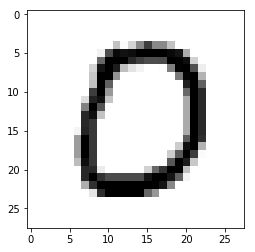

label for test[10] is 0


In [15]:
import matplotlib.pyplot as plt
plt.imshow(test_imgs[10], cmap=plt.cm.binary)
plt.show()
print("label for test[10] is", test_labels[10])

In [6]:
test_imgs = test_imgs.reshape((10000, 28 * 28))
test_imgs = test_imgs.astype('float32') / 255
test_labels = to_categorical(test_labels)

In [7]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
network.fit(train_imgs, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 3s 57us/step - loss: 0.2559 - acc: 0.9259
Epoch 2/5
60000/60000 [==============================] - 3s 54us/step - loss: 0.1024 - acc: 0.9696
Epoch 3/5
60000/60000 [==============================] - 3s 54us/step - loss: 0.0677 - acc: 0.9796
Epoch 4/5
60000/60000 [==============================] - 3s 55us/step - loss: 0.0491 - acc: 0.9851
Epoch 5/5
60000/60000 [==============================] - 3s 54us/step - loss: 0.0371 - acc: 0.9886


In [8]:
test_loss, test_acc = network.evaluate(test_imgs, test_labels)

10000/10000 [==============================] - 0s 40us/step


In [9]:
print('test_acc:', test_acc)

test_acc: 0.9738
